# Image2soduku

The Guardian has a Soduku which appears as a 431 x 431 JPEG image

https://www.theguardian.com/lifeandstyle/2018/mar/07/sudoku-4001-medium

There are a variety of solvers

http://code.activestate.com/recipes/473893-sudoku-solver/

but they take an text array as input.

## Objective

Recognise the digits in the 9 x 9 
grid and convert 
to a list of digits
using just basic **numpy** and **skimage**.

In [31]:
import skimage.io
import numpy as np

from  scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
`


So I downloaded an image to play with in **soduku.jpg**

In [4]:
im = skimage.io.imread('soduku.jpg', flatten=True)
im.shape

(431, 431)

In [35]:
xt = np.sum(im,axis=1)
yt = np.sum(im,axis=0)
#300 is pretty safe
xray = np.where(xt<300)[0]
yray = np.where(yt<300)[0]

Let's look at the distribution of grey in the columns
to justify the choice of 300 as a cutoff

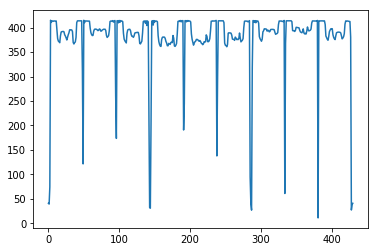

In [60]:
plt.plot(xt)

In [85]:
yy = []
for L in [xray,yray]:
    rr = L - np.roll(L,1)
    rl = L - np.roll(L,-1)
    yy.append( zip( L[ np.where( rl < -1)] + 1, L[ np.where( rr > 1 )] - 1 ) )

In [100]:
M = np.zeros((2,9), dtype = np.int32)
rr = xray - np.roll(xray,1)
M[0,:] = xray[ np.where( rl < -1)] + 1
rr = yray - np.roll(yray,1)
M[1,:] = yray[ np.where( rl < -1)] + 1

In [134]:
starts = np.max(M, axis=0)

In [135]:
import itertools
windows_ul = list(itertools.product(starts ,starts))

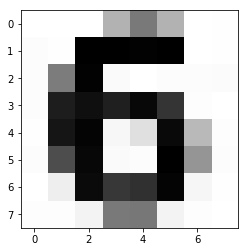

In [252]:
windows_UL = list(itertools.product(starts ,starts))

#0 is a placeholder for a blank square
example_for = {5:0,
0:1,
2:8,
3:22,
4:32,
1:39,
6:20,
7:46,
8:41,
9:42}

import skimage.transform
x_0,y_0 = windows_UL[example_for[6]]
img = im[x_0+7 :x_0+39, y_0+7:y_0+39]
img = skimage.transform.resize(img, (8,8))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [256]:
sx_sy = 32
offset = 7
windows_ul_corner = list(itertools.product(starts + offset, starts + offset))

def box2vec(xx):
    x,y = xx
    #get a chunk, resize, flatten and normalize
    img = im[x:x+sx_sy, y:y+sx_sy]
    v  = skimage.transform.resize(img, (8,8))
    v = v.flatten()
    return v/np.linalg.norm(v)

#we need a library of examples
test_samples = np.zeros((10,64))
for digit in range(0,10):
    test_samples[digit,:] = box2vec( windows_ul_corner[ example_for[digit]])

test_samples = test_samples.transpose()

In [257]:
soduku = []
for dd in windows_ul[:]:
    probas = np.dot(box2vec(dd), test_samples)
    soduku.append( np.where( probas >.98)[0][0] )
    

In [258]:
soduku

[5,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 2,
 0,
 0,
 0,
 0,
 8,
 2,
 0,
 0,
 0,
 2,
 0,
 6,
 0,
 3,
 0,
 0,
 0,
 0,
 9,
 6,
 0,
 0,
 0,
 4,
 0,
 2,
 0,
 0,
 0,
 4,
 1,
 0,
 8,
 9,
 0,
 0,
 0,
 7,
 0,
 3,
 0,
 0,
 0,
 5,
 4,
 0,
 0,
 0,
 0,
 1,
 0,
 7,
 0,
 3,
 0,
 0,
 0,
 4,
 5,
 0,
 0,
 0,
 0,
 6,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 5]